# Excercise 4: Using random variables.

# 1. Implementing your own binomial distribution.

In [33]:
import numpy as np
import matplotlib.pylab as plt

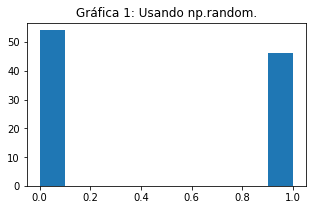

In [34]:
dist = np.random.binomial(1,0.5,100)

plt.figure(figsize=(5,3))
plt.title(u"Gráfica 1: Usando np.random.")
plt.hist(dist)
plt.show()

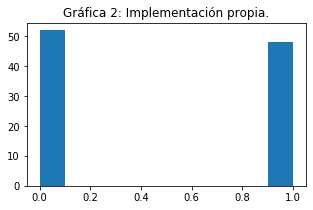

In [35]:
def binomial(p):
    a = np.random.random(100)
    b = []
    for i in range(len(a)):
        if(a[i]>p):
            b.append(0)
        if(a[i]<=p):
            b.append(1)
    return b
            
o = binomial(0.5)

plt.figure(figsize=(5,3))
plt.title(u"Gráfica 2: Implementación propia.")
plt.hist(o)
plt.show()

# Exercise 2: Kinetic gas theory.

1. _Velocidades._

In [36]:
vx = np.random.normal(0,1,100000)
vy = np.random.normal(0,1,100000)
vz = np.random.normal(0,1,100000)

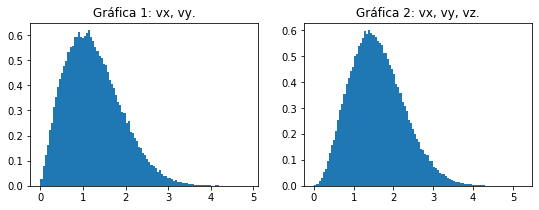

In [37]:
fig2 = plt.figure(figsize=(9,3))

a = fig2.add_subplot(1,2,1)
hist,bins,_ = a.hist(np.sqrt(vx**2+vy**2), bins=100, density=True)
a.set_title(u"Gráfica 1: vx, vy.")

b = fig2.add_subplot(1,2,2)
hist1,bins1,__ = b.hist(np.sqrt(vx**2+vy**2+vz**2), bins=100, density=True)
b.set_title(u"Gráfica 2: vx, vy, vz.")

plt.show()

2. _Fit._

In [38]:
def dist2d(v,a):
    return (a*v*np.exp(-(a*(v**2))/2))

from scipy.optimize import curve_fit

x = (bins[1:]+bins[:-1])*0.5
y = np.copy(hist)
param = curve_fit(dist2d, x, y)[0]

def dist3d(v,a):
    return (np.sqrt(2/np.pi)*((a)**(3/2))*(v**2)*np.exp(-(a*(v**2))/2))

x1 = (bins1[1:]+bins1[:-1])*0.5
y1 = np.copy(hist1)
param1 = curve_fit(dist3d, x1, y1)[0]

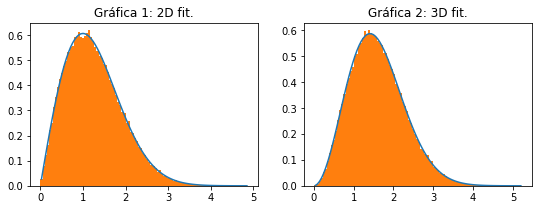

In [39]:
fig = plt.figure(figsize=(9,3))

a = fig.add_subplot(1,2,1)
a.plot(x, dist2d(x,*param))
a.hist(np.sqrt(vx**2+vy**2), bins=100, density=True)
a.set_title(u"Gráfica 1: 2D fit.")

b = fig.add_subplot(1,2,2)
b.plot(x1, dist3d(x1,*param1))
b.hist(np.sqrt(vx**2+vy**2+vz**2), bins=100, density=True)
b.set_title(u"Gráfica 2: 3D fit.")

plt.show()

In [40]:
def R(yp,y):
    a = np.var(yp - y)
    b = np.var(y)
    return 1 - (a/b)

print("2D fit, R² =",R(dist2d(x,*param),y))
print("3D fit, R² =",R(dist3d(x1,*param),y1))

2D fit, R² = 0.9992334519854298
3D fit, R² = 0.9994903334837372


3. _Parameters and argmax comparison._

In [41]:
print("2D fit: max =",np.max(hist),"/ vp =", np.sqrt(2/param[0]), "/ |vp-max| =", np.sqrt(2/param[0]) - np.max(hist))
print("3D fit: max =",np.max(hist1),"/ vp =", np.sqrt(2/param1[0]), "/ |vp-max| =", np.sqrt(2/param1[0]) - np.max(hist1))

2D fit: max = 0.6185763778383025 / vp = 1.4135654239471627 / |vp-max| = 0.7949890461088601
3D fit: max = 0.5996631976349936 / vp = 1.4127122257026854 / |vp-max| = 0.8130490280676917


4. _Average speed._

In [42]:
print("2D fit: np.mean =",np.mean(np.sqrt(vx**2+vy**2)),"/ <vp> =", (2/np.sqrt(np.pi))*np.sqrt(2/param[0]), "/ difference = ", (2/np.sqrt(np.pi))*np.sqrt(2/param[0]) - np.mean(np.sqrt(vx**2+vy**2)))
print("3D fit: np.mean =",np.mean(np.sqrt(vx**2+vy**2+vz**2)),"/ <vp> =", (2/np.sqrt(np.pi))*np.sqrt(2/param1[0]), "/ difference = ", np.mean(np.sqrt(vx**2+vy**2+vz**2))-(2/np.sqrt(np.pi))*np.sqrt(2/param1[0]))

2D fit: np.mean = 1.2530228050628693 / <vp> = 1.5950377757085146 / difference =  0.34201497064564523
3D fit: np.mean = 1.594519451436809 / <vp> = 1.594075044584044 / difference =  0.0004444068527651446


# Exercise 3: Poisson limit.

1. _Test for different values of n and p and see how these affect the shape of the binomial distribution._

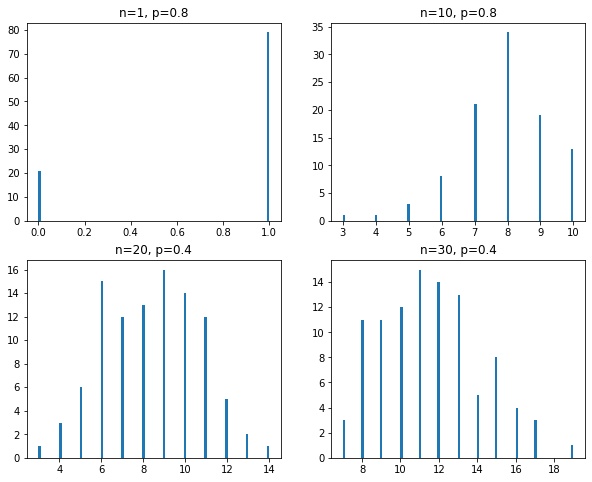

In [43]:
binomial_distribution1 = np.random.binomial(1,0.8,100)
Poisson_distribution1 = np.random.poisson(0.8,100)

binomial_distribution2 = np.random.binomial(10,0.8,100)
Poisson_distribution2 = np.random.poisson(0.5,100)

binomial_distribution3 = np.random.binomial(20,0.4,100)
Poisson_distribution3 = np.random.poisson(0.2,100)

binomial_distribution4 = np.random.binomial(30,0.4,100)
Poisson_distribution4 = np.random.poisson(0.01,100)

fig = plt.figure(figsize=(10,8))

a = fig.add_subplot(2,2,1)
a.hist(binomial_distribution1,bins=100)
a.set_title("n=1, p=0.8")

b = fig.add_subplot(2,2,2)
b.hist(binomial_distribution2,bins=100)
b.set_title("n=10, p=0.8")

c = fig.add_subplot(2,2,3)
c.hist(binomial_distribution3,bins=100)
c.set_title("n=20, p=0.4")

d = fig.add_subplot(2,2,4)
d.hist(binomial_distribution4,bins=100)
d.set_title("n=30, p=0.4")

plt.show()

2. _Plot the Poisson distribution with the respective parameter and see how they resemble._

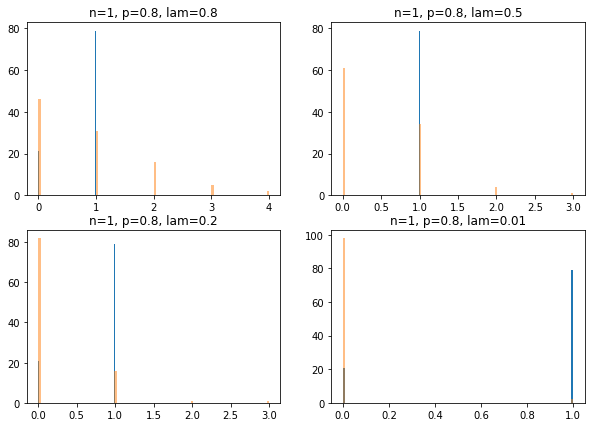

In [44]:
fig = plt.figure(figsize=(10,7))

a = fig.add_subplot(2,2,1)
a.hist(binomial_distribution1,bins=100)
a.hist(Poisson_distribution1,bins=100,alpha=0.5)
a.set_title("n=1, p=0.8, lam=0.8")

b = fig.add_subplot(2,2,2)
b.hist(binomial_distribution1,bins=100)
b.hist(Poisson_distribution2,bins=100,alpha=0.5)
b.set_title("n=1, p=0.8, lam=0.5")

c = fig.add_subplot(2,2,3)
c.hist(binomial_distribution1,bins=100)
c.hist(Poisson_distribution3,bins=100,alpha=0.5)
c.set_title("n=1, p=0.8, lam=0.2")

d = fig.add_subplot(2,2,4)
d.hist(binomial_distribution1,bins=100)
d.hist(Poisson_distribution4,bins=100,alpha=0.5)
d.set_title("n=1, p=0.8, lam=0.01")

plt.show()

# Exercise 4.

In [45]:
def Expected(px):
    e = 0
    for i in range(len(px)):
        e = e + ((i+1)**2)*(px[i])
    return (e)

In [46]:
def test1():
    px = np.array([0.01720472,  0.23565573,  0.7425048,  0.68060143,  0.25665851])
    res = 13.437623957331406
    ans = Expected(px)
    return (abs(res-ans) < 0.00001)
test1()

False

# Exercise 5: Try something harder.

In [47]:
def p2(p0):
    return 2

In [48]:
def test2():
    p0 = 0.7
    res = 1440.3292181069949
    ans = p2(p0)
    return (abs(res-ans) < 0.001)
test2()

False

In [95]:
arr = np.random.binomial(1,0.7,5)
count = 0
for i in range(len(arr)):
    if(arr[i]==1):
        count = count + 1
print(count,arr)

5 [1 1 1 1 1]
